# Analyzing Crime in Los Angeles

## Project Description

<figure>
<img src="files/la_skyline.jpg" alt="Los Angeles, California">
<figcaption>Los Angeles, California</figcaption>
</figure>

You have been tasked to support the Los Angeles Police Department (LAPD) by analyzing crime data  
to identify patterns in criminal behavior. 

They plan to use your insights to allocate resources effectively to tackle various crimes in different  
areas.

## Data Summary

A modified version of the original data, which is publicly available from Los Angeles Open Data,  
has been provided.

### crimes.csv

| Column        | Description              |
|---------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [3]:
# Read CSV file and perform data preprocessing
crimes = pd.read_csv("files/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC":str})

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


**Explore the crimes.csv dataset and use your findings to answer the following questions:**

* Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

* Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?  
Save as a string variable called peak_night_crime_location.

* Identify the number of crimes committed against victims of different age groups. Save as a pandas  
Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64",  
and "65+" as the index and the frequency of crimes as the values.

**1. Finding the frequencies of crimes by the hour of occurrence**

In [4]:
# Extract the hour that each crime was committed
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

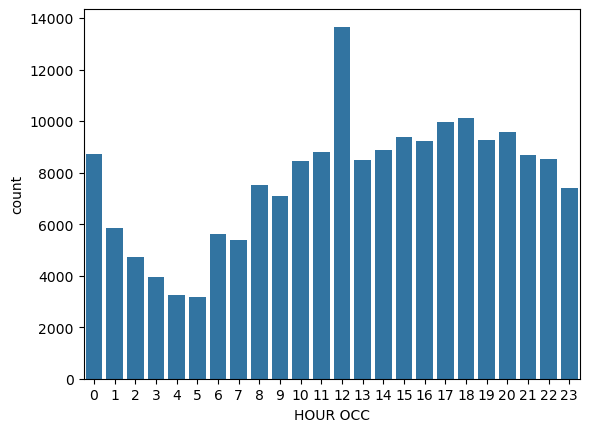

In [5]:
# Visualise the count of crimes per hour
sns.countplot(x=crimes["HOUR OCC"], data=crimes)

plt.show()

In [14]:
# Store the hour with the highest crime frequency
peak_crime_hour = 12

print("Hour with the highest crime frequency:", peak_crime_hour)

Hour with the highest crime frequency: 12


**2. Identifying the area with the most night crime**

In [7]:
# Subset the DataFrame for crimes between 10pm and 3:59am
night_crimes = crimes[crimes["HOUR OCC"].isin([10, 11, 12, 1, 2, 3])]

In [8]:
# Preview the DataFrame
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST,10
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV,12
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1


In [9]:
# Count crime by area
area_frequency = night_crimes.groupby("AREA NAME", as_index=False)["HOUR OCC"].count()

# Sort number of crimes by area in descending order
area_frequency.sort_values(by="HOUR OCC", ignore_index=True, ascending=False, inplace=True)

area_frequency.head()

,AREA NAME,HOUR OCC
0,Central,3538
1,77th Street,2953
2,Southwest,2796
3,Hollywood,2611
4,Pacific,2370


In [13]:
# Store the area with the largest frequency of night crimes
peak_night_crime_location = area_frequency.iloc[0, 0]

print("Area with the largest frequency of night crimes:", peak_night_crime_location)

Area with the largest frequency of night crimes: Central


**3. Crimes by age group**

In [11]:
# Create bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Bin and label victim age into the respective groups
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


In [16]:
# Count crimes by victim age group
victim_ages = crimes["Age Bracket"].value_counts().reset_index()

victim_ages.columns = ["Age Bracket", "Number of Victims"]

print("Number of crime victims by age group:")
victim_ages

Number of crime victims by age group:


,Age Bracket,Number of Victims
0,26-34,47470
1,35-44,42157
2,45-54,28353
3,18-25,28291
4,55-64,20169
5,65+,14747
6,0-17,4528


<div style="text-align: center; font-size: 18px; font-weight: bold; color: #F5DEB3;">
<span>[ End of notebook ]</span>
</div>